In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest

In [106]:
train= pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [107]:
train.shape

(30161, 14)

In [108]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [109]:
 test= pd.read_csv('SalaryData_Test.csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [110]:
test.shape

(15060, 14)

In [111]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [112]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [113]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='Salary', ylabel='count'>

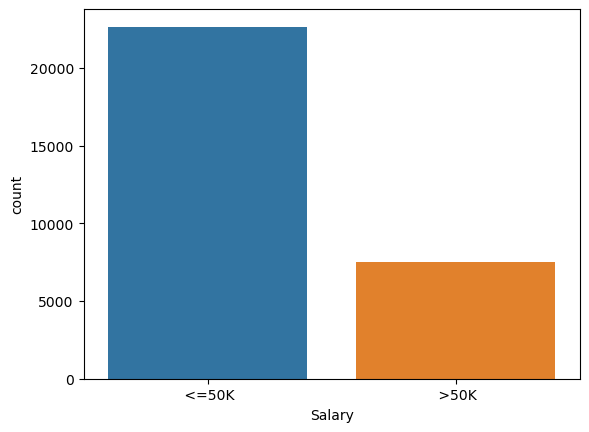

In [114]:
import seaborn as sns
sns.countplot(x = train['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

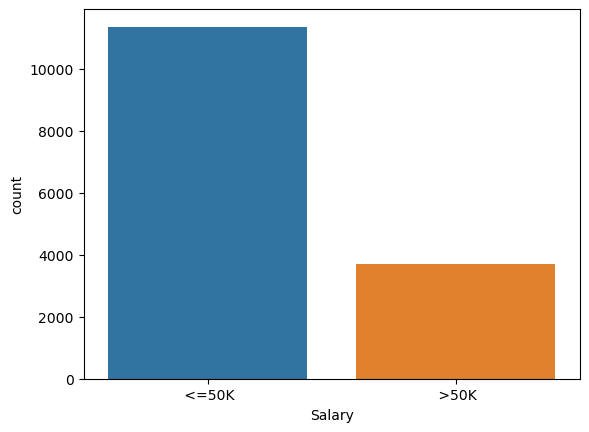

In [115]:
sns.countplot(x = test['Salary'])

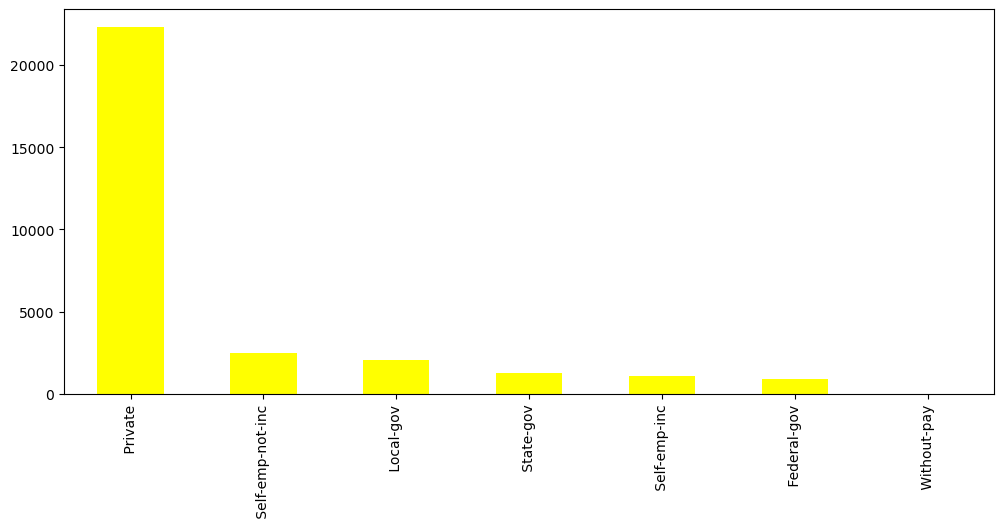

In [116]:
#workclass
plt.figure(figsize=(12,5))
train.workclass.value_counts().plot.bar(color='yellow');


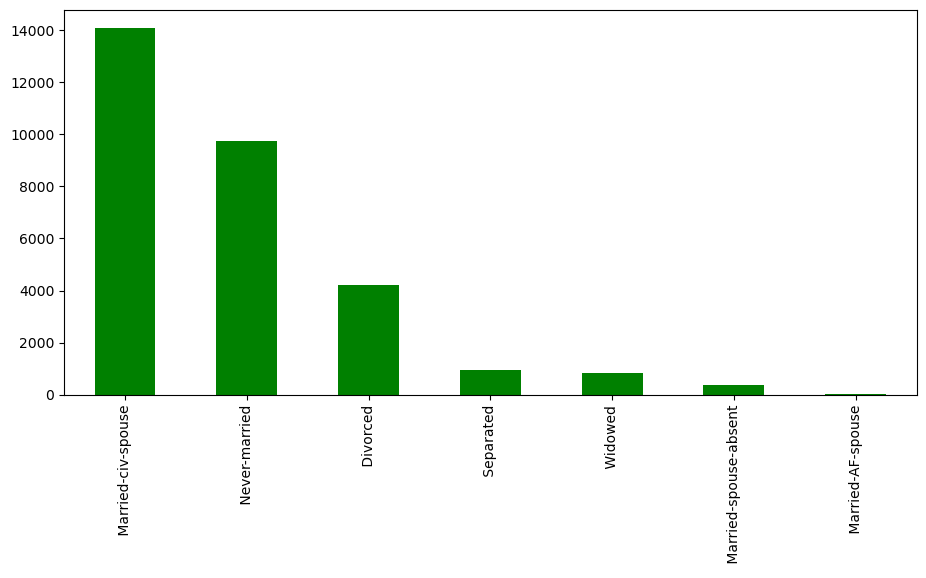

In [117]:
plt.figure(figsize=(11,5))
train.maritalstatus.value_counts().plot.bar(color='green');


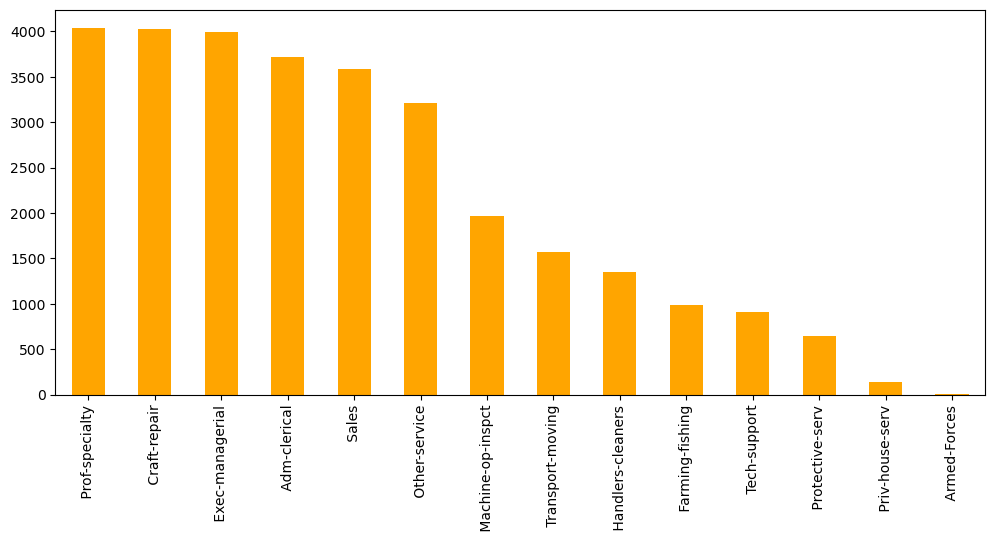

In [118]:
plt.figure(figsize=(12,5))
train.occupation.value_counts().plot.bar(color='orange');

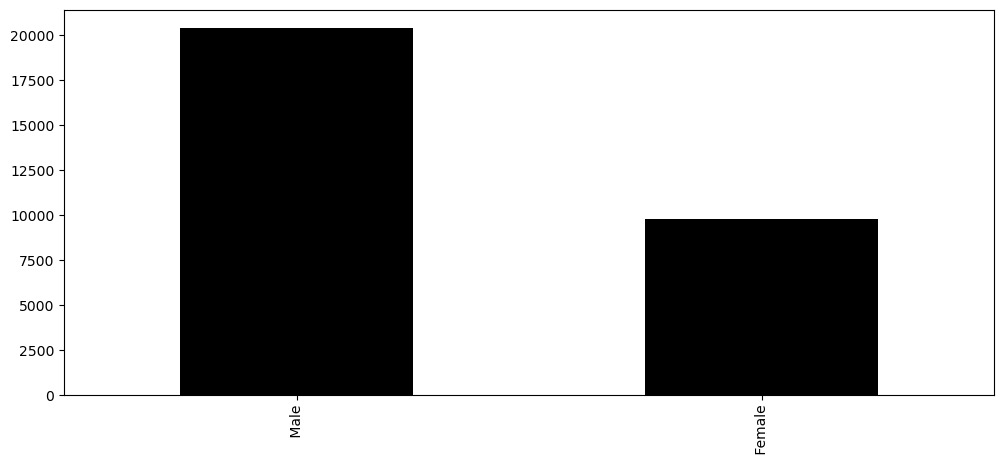

In [128]:
plt.figure(figsize=(12,5))
train.sex.value_counts().plot.bar(color='black');

In [129]:
import warnings
warnings.filterwarnings('ignore')
#merging our train and test data 
df = train.append(test)
df.reset_index(inplace=True,drop=True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [130]:
#checking with info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [131]:
#checking if we have any duplicate records 
(df[df.duplicated()])

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [132]:
df2 = df.drop_duplicates()
df2.shape

(39239, 14)

In [133]:
#checking  again if we have any duplicate records 
(df2[df2.duplicated()])

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [134]:
#cheking with descriptive statistics of our data 
df2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,10.136293,1253.346186,101.207727,41.206121
std,13.298159,2.637228,7994.096625,431.309171,12.458178
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [135]:
#checking if we have any null values 
print(df.isna().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [136]:
#checking for salary the distribution of data
df.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

In [137]:
# find categorical variables

categorical = [var for var in df2.columns if df2[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [138]:
#distribution of our independent data 
for var in categorical:
    print(df2[var].value_counts())

 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64
 Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical         4742
 Sales                4671
 Craft-repair    

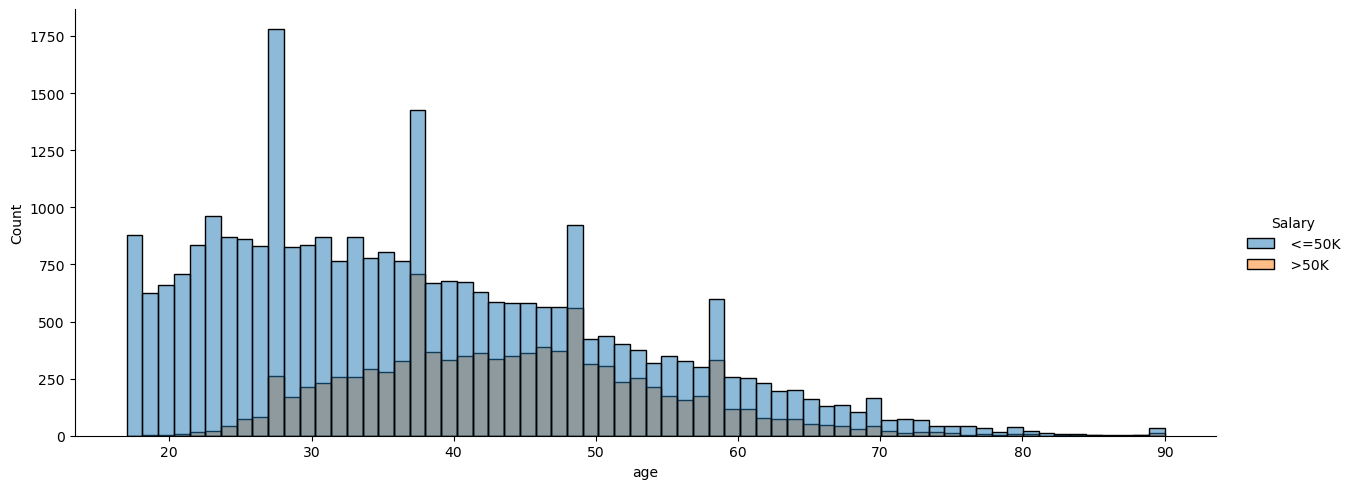

In [30]:
#checking the distribution of salary compared to age
sns.displot(df2,x='age',hue= 'Salary',aspect=20/8)

<AxesSubplot:ylabel='education'>

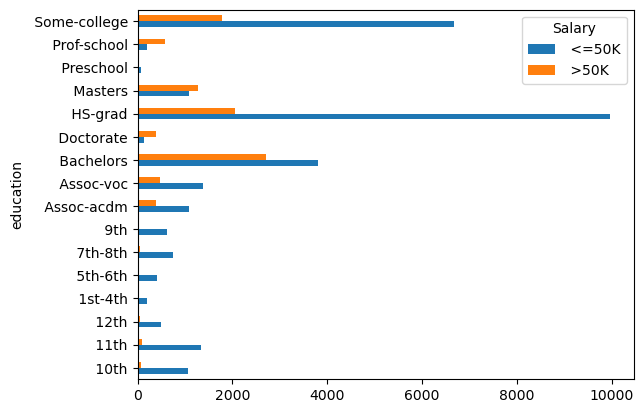

In [31]:
#checking the salary distribution according education
pd.crosstab(df2.education,df2.Salary).plot(kind = 'barh')

<AxesSubplot:ylabel='occupation'>

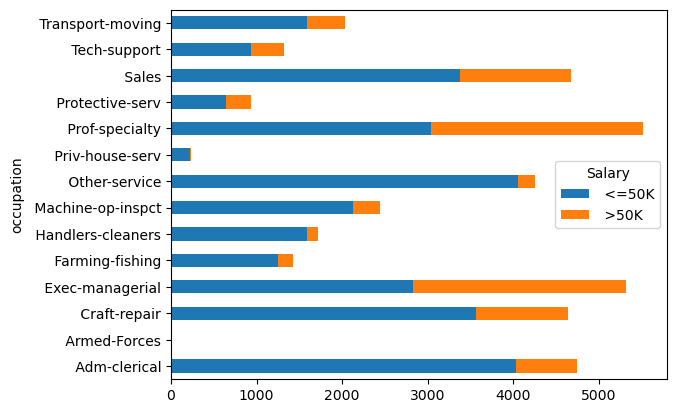

In [33]:
#checking with occupation and salary as salary is affected by occupation and roles
pd.crosstab(df2.occupation,df2.Salary).plot(kind = 'barh',stacked=True)

<AxesSubplot:xlabel='workclass'>

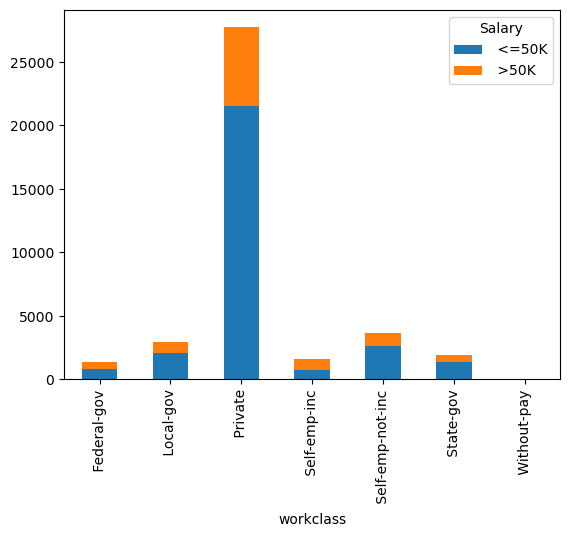

In [35]:
pd.crosstab(df2.workclass,df2.Salary).plot(kind = 'bar',stacked=True)

<AxesSubplot:xlabel='sex'>

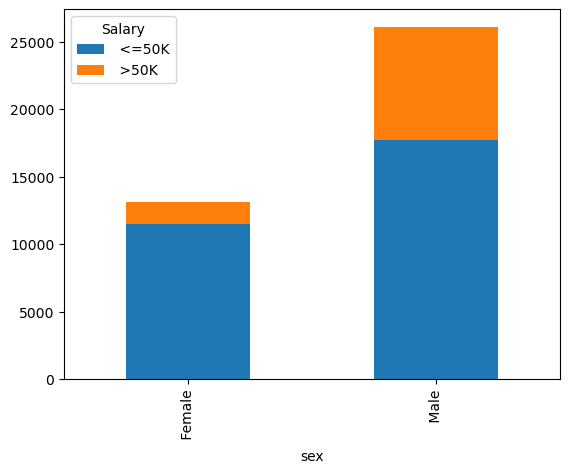

In [36]:
#checking salary distribution with gender 
pd.crosstab(df2.sex,df2.Salary).plot(kind = 'bar',stacked=True)

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

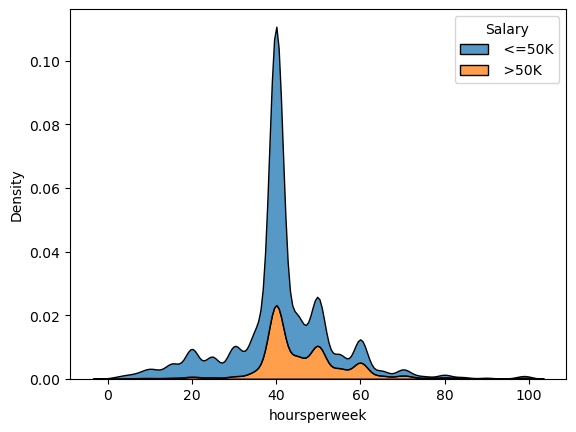

In [38]:
sns.kdeplot(data= df2,x='hoursperweek',hue='Salary',multiple='stack')

In [39]:
#setting label encoder for all categorical values 
df3 = df2.copy()
cols = ['workclass','education','maritalstatus','occupation','relationship',
      'race','sex','native','Salary']
df3[cols] = df2[cols].apply(LabelEncoder().fit_transform)

df3.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [40]:
#checking with correlation matrix
df3.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.079642,0.001807,0.030211,-0.233279,-0.004676,-0.230643,0.044616,0.068483,0.075495,0.049876,0.066927,0.012129,0.214285
workclass,0.079642,1.000000,0.022333,0.041859,-0.031786,0.016217,-0.070247,0.059339,0.075331,0.031985,0.002649,0.047542,0.010469,0.015598
education,0.001807,0.022333,1.000000,0.366443,-0.043411,-0.020636,-0.010764,0.003913,-0.029864,0.035072,0.024082,0.060431,0.075014,0.094952
educationno,0.030211,0.041859,0.366443,1.000000,-0.069475,0.087334,-0.085939,0.033594,0.006596,0.129552,0.082594,0.136030,0.097527,0.329569
maritalstatus,-0.233279,-0.031786,-0.043411,-0.069475,1.000000,0.006666,0.155762,-0.075430,-0.109154,-0.042309,-0.033607,-0.167011,-0.026461,-0.181626
occupation,-0.004676,0.016217,-0.020636,0.087334,0.006666,1.000000,-0.061367,0.008746,0.061054,0.016952,0.010978,0.020983,0.004230,0.049738
relationship,-0.230643,-0.070247,-0.010764,-0.085939,0.155762,-0.061367,1.000000,-0.113604,-0.584810,-0.062712,-0.066390,-0.247737,-0.001036,-0.244911
race,0.044616,0.059339,0.003913,0.033594,-0.075430,0.008746,-0.113604,1.000000,0.085235,0.021099,0.031794,0.053968,0.116142,0.078779
sex,0.068483,0.075331,-0.029864,0.006596,-0.109154,0.061054,-0.584810,0.085235,1.000000,0.052882,0.053687,0.226747,-0.010639,0.212912
capitalgain,0.075495,0.031985,0.035072,0.129552,-0.042309,0.016952,-0.062712,0.021099,0.052882,1.000000,-0.036791,0.082977,0.012924,0.231529


<AxesSubplot:>

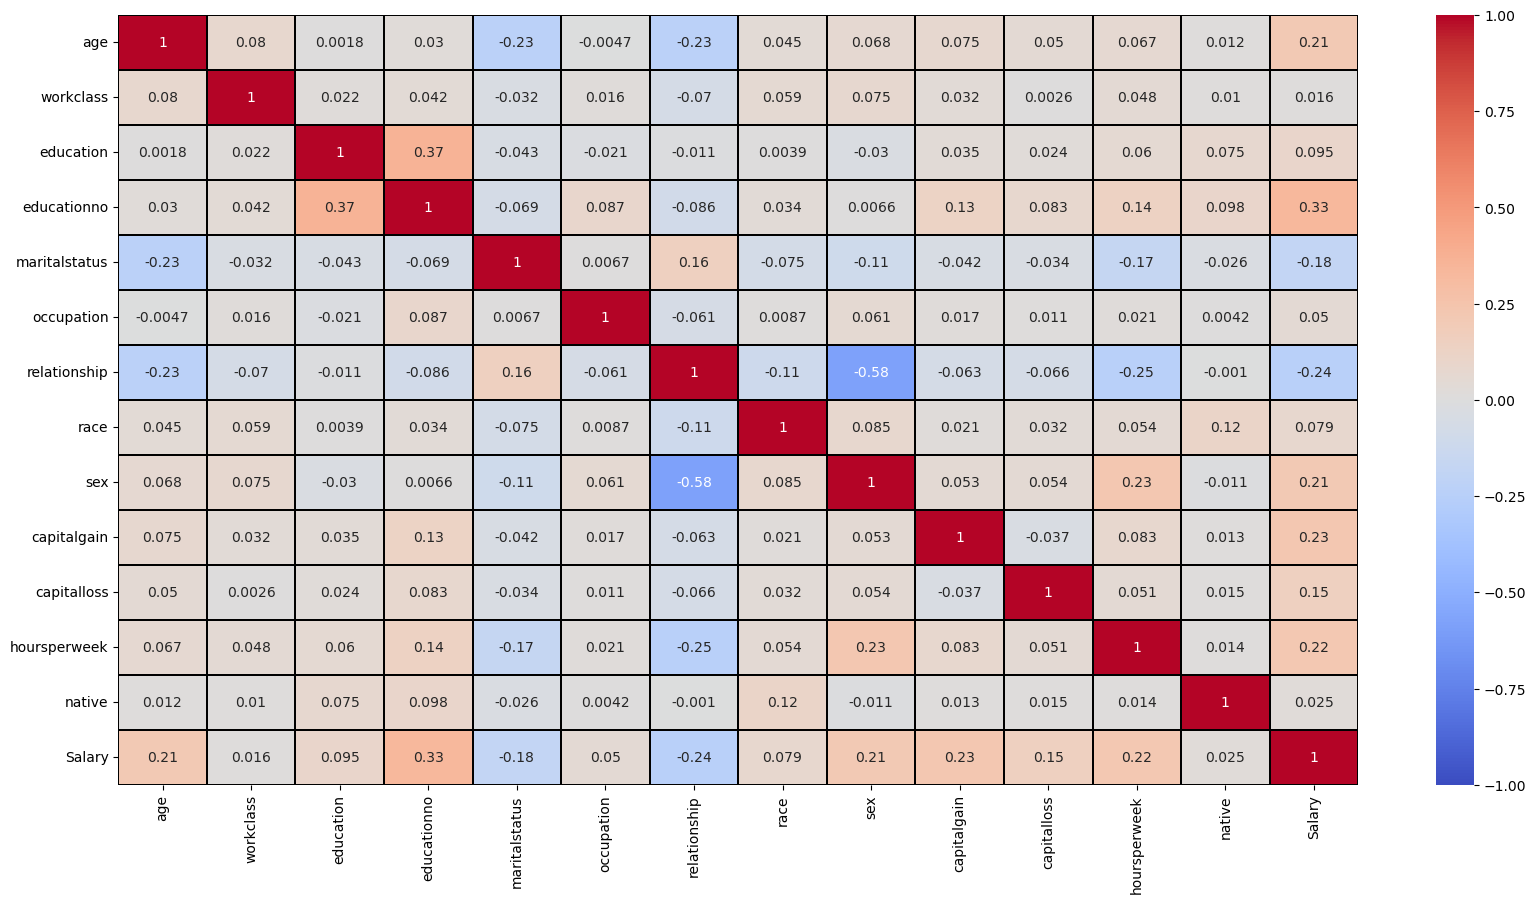

In [42]:
#plotting the maximum correlation with plot 
corr = df3.corr()
top_features = corr.index
plt.figure(figsize=(20,10))
sns.heatmap(df3[top_features].corr(),annot = True,linecolor='black',cbar='blue',linewidths=0.2,cmap='coolwarm',
          vmax=1,vmin=-1)

<AxesSubplot:>

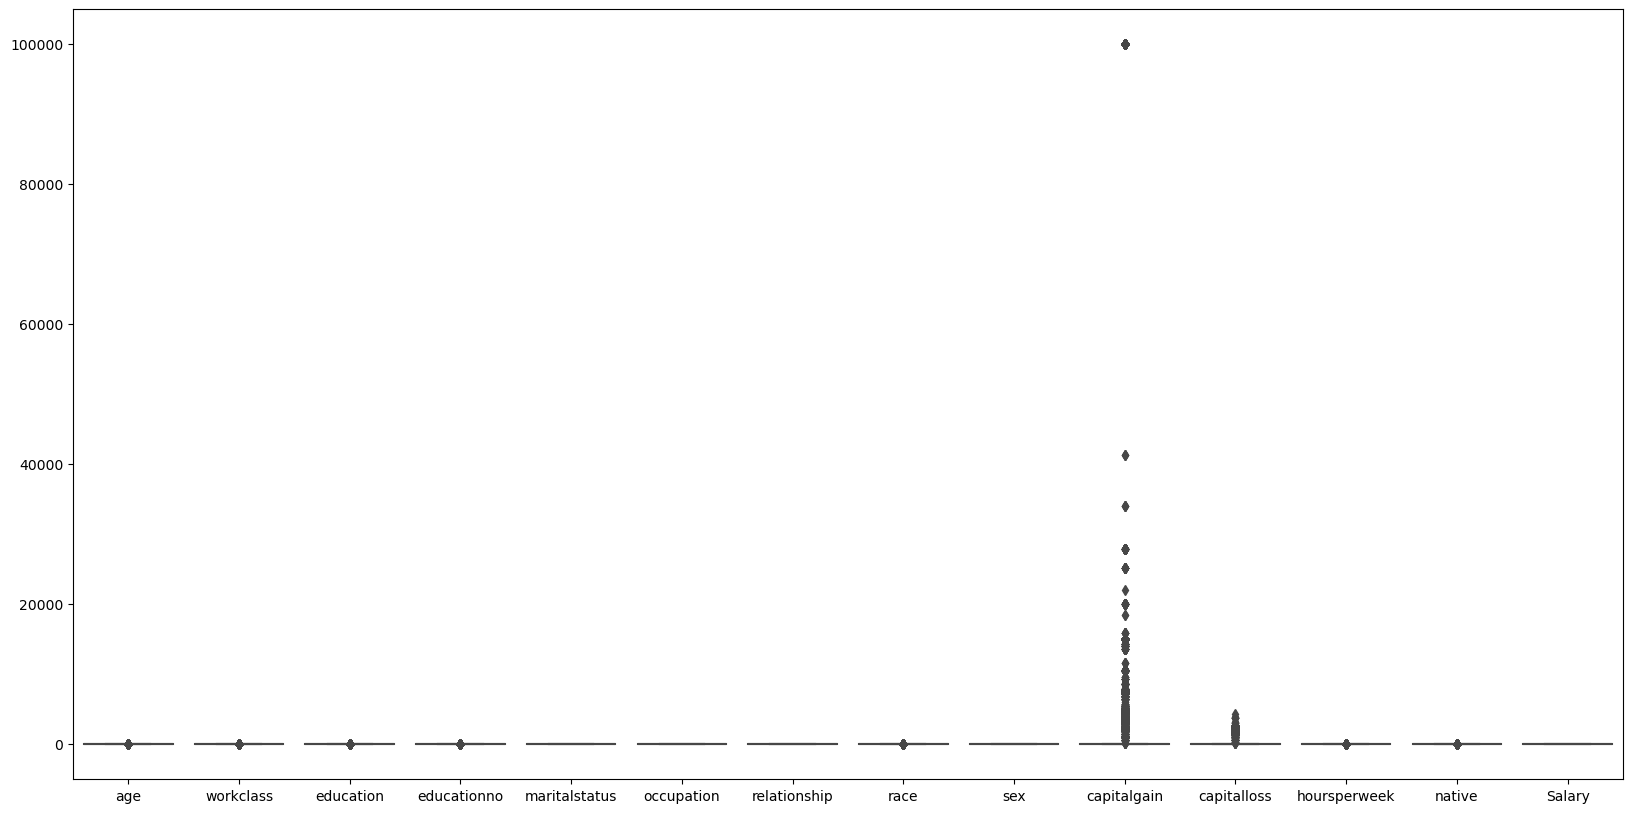

In [44]:
#checking for outliers in the given dataset
plt.figure(figsize=(20,10))
sns.boxplot(data=df3)

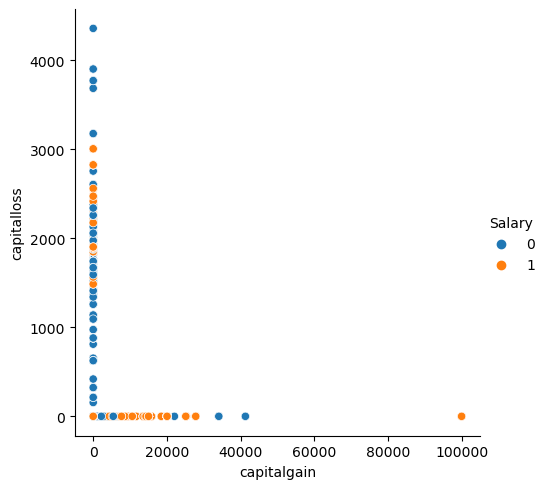

In [46]:
#checking relation of capital loss and capital gain in comparison to salary
sns.relplot(data=df3,x='capitalgain',y='capitalloss',hue='Salary')

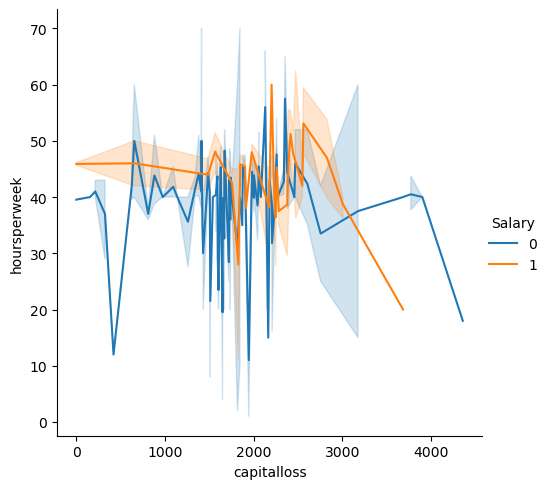

In [48]:
#checking relation of hoursperweek and capital loss in comparison to salary
sns.relplot(data=df3,x='capitalloss',y='hoursperweek',hue='Salary',kind='line')

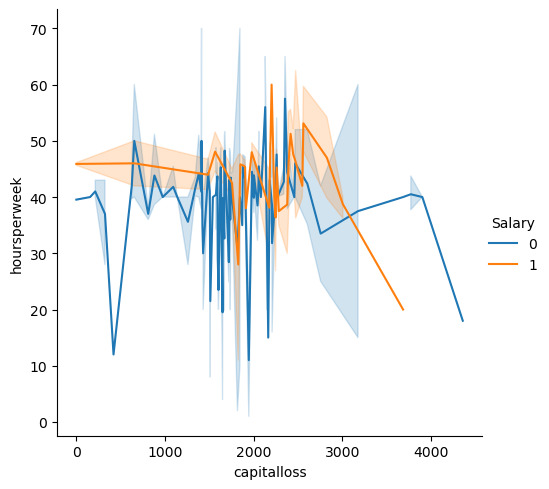

In [50]:
#checking relation of hoursperweek and capital loss in comparison to salary
sns.relplot(data=df3,x='capitalloss',y='hoursperweek',hue='Salary',kind='line')

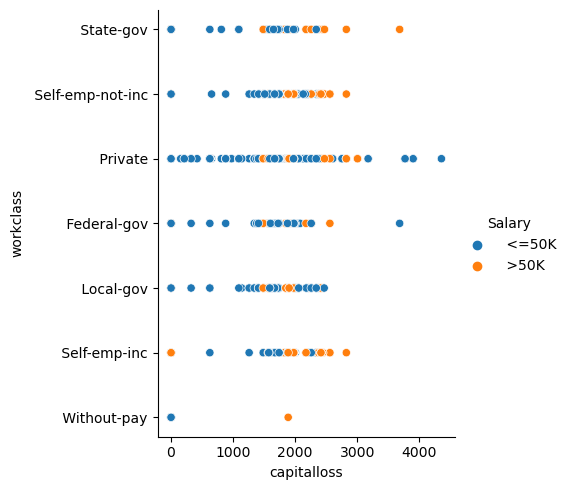

In [52]:
#checking relation of workclass and capital loss in comparison to salary
sns.relplot(data=df2,x='capitalloss',y='workclass',hue='Salary')

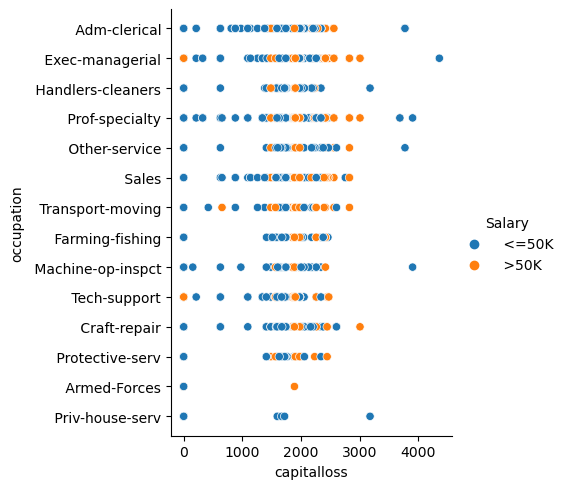

In [53]:
#checking relation of occupation and capital loss in comparison to salary
sns.relplot(data=df2,x='capitalloss',y='occupation',hue='Salary')

<AxesSubplot:xlabel='capitalgain'>

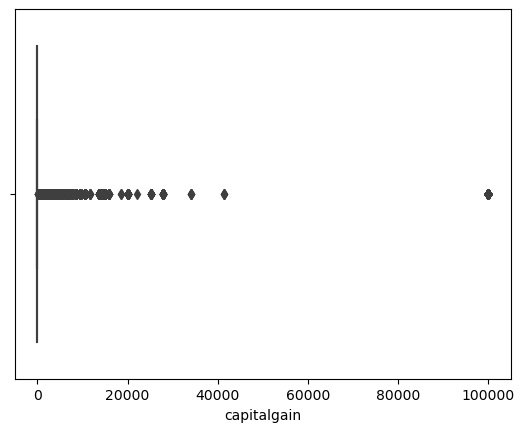

In [55]:
#checking the outliers in the capital gain 
sns.boxplot(df3['capitalgain'])

In [56]:
#locating our upper and lower limit
ul = df3['capitalgain'].quantile(0.99)
ll = df3['capitalgain'].quantile(0.01)
print(ul,ll)

15024.0 0.0


In [57]:
#trimming the outliers 
df4 = df3[(df3['capitalgain']<=15024)&(df3['capitalgain']>0)]


<AxesSubplot:xlabel='capitalgain'>

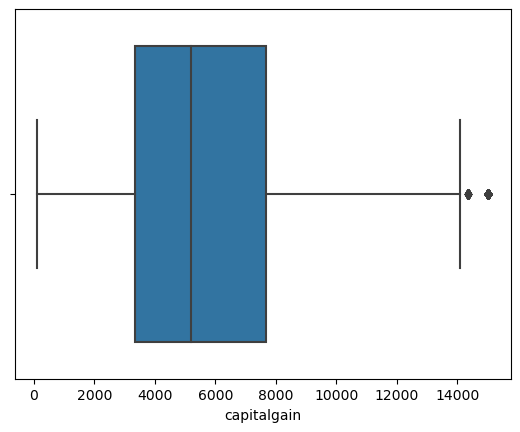

In [59]:
#plotting after trimming the outliers
sns.boxplot(df4['capitalgain'])

In [60]:
#capping or winsorization method 
df4['capitalgain'] = np.where(df4['capitalgain']>=ul,
                      ul,
                      np.where(df4['capitalgain']<=ll,
                              ll,
                              df4['capitalgain']))

<AxesSubplot:xlabel='capitalgain'>

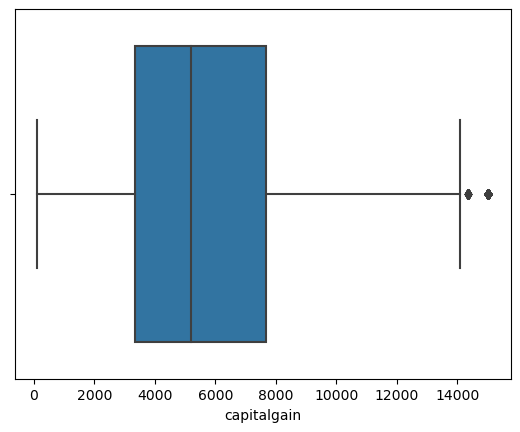

In [62]:
#plotting after capping
sns.boxplot(df4['capitalgain'])

<AxesSubplot:>

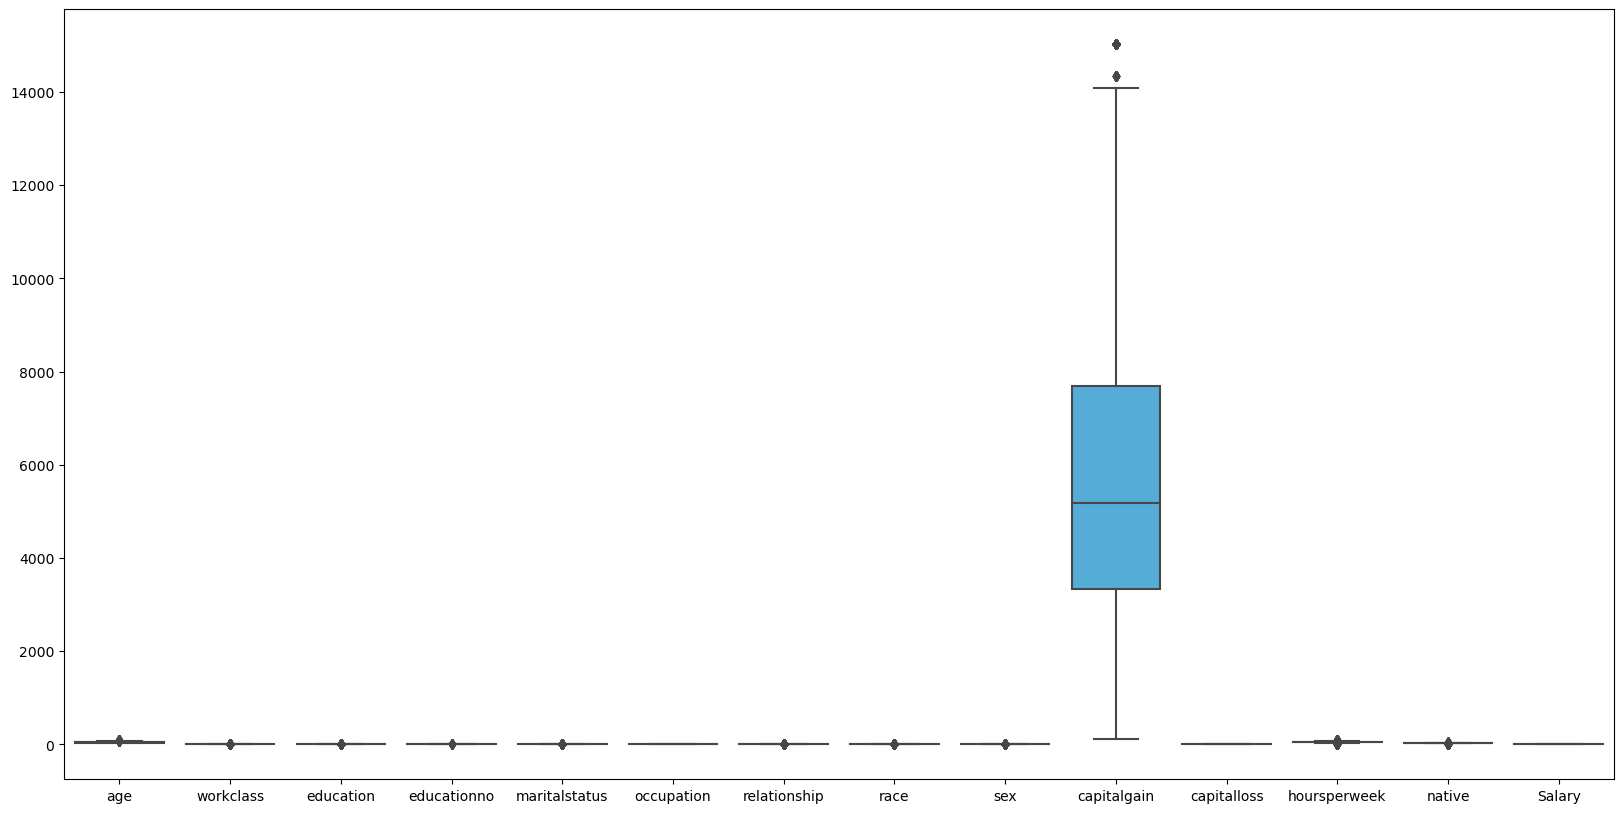

In [64]:
#checking for any outliers in the given dataset
plt.figure(figsize=(20,10))
sns.boxplot(data=df4)

In [65]:
df4.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0,40,37,0
8,31,2,12,14,4,9,1,4,0,14084.0,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178.0,0,40,37,1
55,30,2,11,9,2,6,0,4,1,5013.0,0,40,37,0
56,30,2,9,13,2,11,0,4,1,2407.0,0,40,37,0


In [66]:
df4.dtypes

age                int64
workclass          int32
education          int32
educationno        int64
maritalstatus      int32
occupation         int32
relationship       int32
race               int32
sex                int32
capitalgain      float64
capitalloss        int64
hoursperweek       int64
native             int32
Salary             int32
dtype: object

In [67]:
#chi square analysis: splitting our independent and dependent variables
X = df4.iloc[:,0:13]
y = df4.iloc[:,13]
print(X.shape,y.shape)

(3390, 13) (3390,)


In [68]:
#fitting our model on chi test
best_feat = SelectKBest(score_func=chi2,k=10)
feat_sel = best_feat.fit(X,y)

In [69]:
#summarise scores
scores = feat_sel.scores_

features = feat_sel.transform(X)

In [70]:
#fitting our scores in Dataframe
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                       columns =['score','Feature'])
score_df.sort_values(by="score",ascending=False,inplace=True)
score_df

,score,Feature
9,4.163478e+06,capitalgain
11,5.088888e+02,hoursperweek
6,3.783627e+02,relationship
3,2.812659e+02,educationno
0,2.022281e+02,age
4,8.162895e+01,maritalstatus
8,3.297121e+01,sex
5,2.855498e+01,occupation
2,2.247681e+01,education
12,2.864509e+00,native


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
#plotting feature  selection by mutual importances
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [73]:
print(model.feature_importances_)

[0.07848197 0.02834351 0.02966619 0.0650236  0.06024335 0.04507168
 0.06111737 0.0127662  0.02237735 0.53149536 0.         0.05552347
 0.00988995]


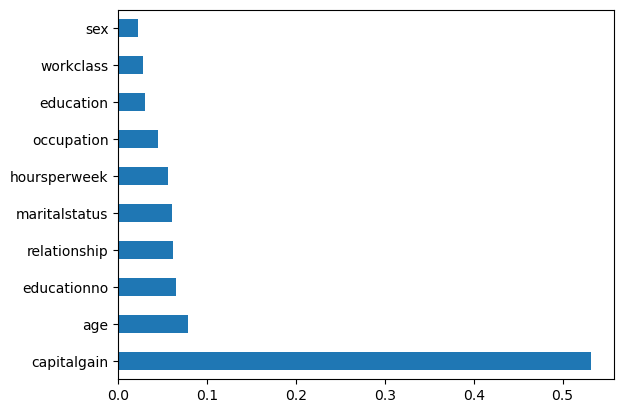

In [74]:
#selection for our top 10 features
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [75]:
#selecting our top features after selection 
df5 = df4[['age','relationship','educationno','capitalgain','maritalstatus','hoursperweek','occupation','workclass',
          'sex','Salary']]

In [76]:
df5.head()

,age,relationship,educationno,capitalgain,maritalstatus,hoursperweek,occupation,workclass,sex,Salary
0,39,1,13,2174.0,4,40,0,5,1,0
8,31,1,14,14084.0,4,50,9,2,0,1
9,42,0,13,5178.0,2,40,3,2,1,1
55,30,0,9,5013.0,2,40,6,2,1,0
56,30,0,13,2407.0,2,40,11,2,1,0


In [77]:
#checking the balance of our dependent variable 
df5.Salary.value_counts()

1    1987
0    1403
Name: Salary, dtype: int64

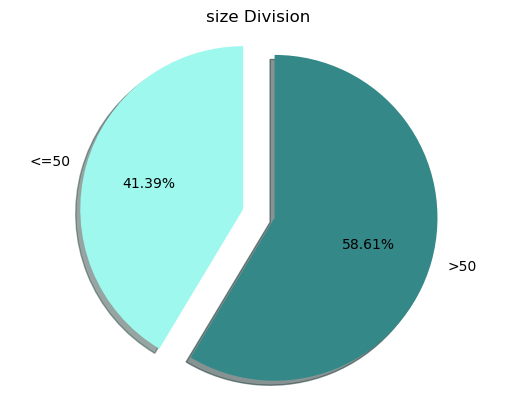

In [78]:
#plotting pie chart to understand well the balance of data
labels =['<=50','>50']
colors =['#9EF8EE','#348888']
sizes = [1403,1987]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('size Division')
plt.axis('equal')
plt.show()


In [79]:
#splitting our extracted data into train test split
X2 = df5.iloc[:,0:9]
y2 = df5.iloc[:,9]
print(X2.shape,y2.shape)

(3390, 9) (3390,)


In [80]:
#fitting our train and test split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.4)

<IPython.core.display.Javascript object>

In [89]:
#checking our balance of data after train test split
print('Training Features Shape:', X2_train.shape)
print('Training Labels Shape:', X2_test.shape)
print('Testing Features Shape:', y2_train.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (2034, 9)
Training Labels Shape: (1356, 9)
Testing Features Shape: (2034,)
Testing Labels Shape: (1356,)


In [90]:
#Hyperparameter tuning for naive bayes
#fitting our parameters for gaussian Naive bayes
params = {'priors':[None,[0.1,0.01,0.001]],
         'var_smoothing':[1e-9,1e-6,1e-12]
         }

In [91]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,CategoricalNB,ComplementNB
from sklearn.model_selection import learning_curve
#fitting our model to locate parameters
gauss_nb_grid = GridSearchCV(GaussianNB(),param_grid=params,n_jobs=2,cv=5,verbose=10)
gauss_nb_grid.fit(X2_train,y2_train)


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=2,
             param_grid={'priors': [None, [0.1, 0.01, 0.001]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             verbose=10)

In [92]:
#printing the optimal parameters 
print('Best Accuracy Through Grid Search : {:.3f}'.format(gauss_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gauss_nb_grid.best_params_))

Best Accuracy Through Grid Search : 0.875
Best Parameters : {'priors': None, 'var_smoothing': 1e-09}



In [94]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#predictions and report with our best parameters 
preds_gaussian = gauss_nb_grid.best_estimator_.predict(X2_test)
preds_gaussian_train = gauss_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_gaussian)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_gaussian_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_gaussian))

Test Accuracy Score : 0.871
Train Accuracy Score : 0.879

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       539
           1       0.90      0.89      0.89       817

    accuracy                           0.87      1356
   macro avg       0.86      0.87      0.87      1356
weighted avg       0.87      0.87      0.87      1356



In [99]:
#fitting our parameters 
params_mul = {'alpha': [0.01, 0.1, 1.0, 10.0, ],
          'fit_prior': [True, False],
          
          'class_prior': [None, [0.1]]
         }

In [100]:
#fitting our model to locate parameters
mul_nb_grid = GridSearchCV(MultinomialNB(),param_grid=params_mul,n_jobs=2,cv=5,verbose=10)
mul_nb_grid.fit(X2_train,y2_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=2,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'class_prior': [None, [0.1]],
                         'fit_prior': [True, False]},
             verbose=10)

In [101]:
#printing the optimal parameters 
print('Best Accuracy Through Grid Search : {:.3f}'.format(mul_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(mul_nb_grid.best_params_))

Best Accuracy Through Grid Search : 0.845
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': False}



In [102]:
#predictions and report with our best parameters 
preds_multinomial = mul_nb_grid.best_estimator_.predict(X2_test)
preds_multinomial_train = mul_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_multinomial)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_multinomial_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_multinomial))

Test Accuracy Score : 0.828
Train Accuracy Score : 0.844

Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       539
           1       0.89      0.81      0.85       817

    accuracy                           0.83      1356
   macro avg       0.82      0.83      0.82      1356
weighted avg       0.84      0.83      0.83      1356



In [104]:
#storing our actua and predicted values
final_preds = pd.DataFrame({'actual':y2_test,'predicted':preds_gaussian})
final_preds

,actual,predicted
10717,1,1
22457,1,1
38825,1,1
36205,1,1
28815,1,1
...,...,...
23231,1,1
28006,0,0
8448,1,1
5104,1,1
